Importing important dependencies for data analysis and visualization

Importing the important dependencies

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os  # to call the image files for training and validation
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

Importing Deep Learning Libraries 

In [4]:
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator

# importing important layers which are required for making the cnn model
from keras.layers import Dense, Input, Dropout
from keras.layers import GlobalAveragePooling2D
from keras.layers import Flatten, Conv2D, BatchNormalization
from keras.layers import Activation, MaxPooling2D

# importing important keras optimizers and models
#importing models
from keras.models import Model, Sequential
# importing optimizers to to reduce the losses and get results faster
from keras.optimizers import Adam, SGD, RMSprop

Displaying some of the images to get the idea of what are the images that are going to use to train the model

In [5]:
# standardizing the size of each and every picture because its not necessary that each picture is of one standard size
# standardizing the picture to be of size 48 * 48
picture_size = 48
# defining the folder path
folder_path = "../input/face-expression-recognition-dataset/images/"

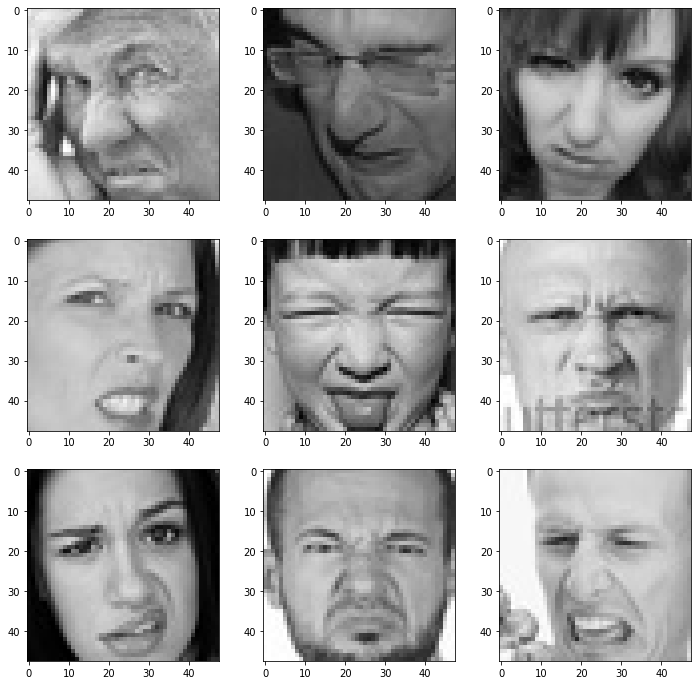

In [6]:
# plotting some of the images from "disgust" folder
expression = 'disgust'
# defining figure size of the matplotlib graph by 12 * 12
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    # os.listdir() is used to get the list of all files and directories in the specified directory
    img = load_img(folder_path+"train/"+expression+"/"+
                   os.listdir(folder_path + "train/" + expression)[i], target_size = (picture_size, picture_size))
    # displaying data as an image
    plt.imshow(img)
plt.show()

Make the Training and validation it's like Train, Test, Split

In [7]:
# batch_size defines how many training example the model should take in one iteration.
batch_size = 128

# defining two variables as ImageDatagenerator
datagen_train = ImageDataGenerator()
datagen_eval = ImageDataGenerator()

# defining two variaables that are train_set and test_set
# these variables are going to contain data which is comming from the directory
"""
the data which is present in train folder is given to datagen_train(which is the ImageDataGerator) and is stored in vatiable train_set 
using flow_from_directory function
"""
train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              # defining class mode as categorical because there are 7 different categories of output
                                              class_mode = 'categorical',
                                              shuffle = True)
"""
the data which is present in test folder is given to datagen_eval(which is the ImageDataGerator) and is stored in vatiable test_set 
using flow_from_directory function
"""
test_set = datagen_train.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size, picture_size),
                                              color_mode = "grayscale",
                                              batch_size = batch_size,
                                              # defining class mode as categorical because there are 7 different categories of output
                                              class_mode = 'categorical',
                                              shuffle = False)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


Defining the Model 
(Here i'm going to build the artificial neural network that is going to detect different different emotions)

In [8]:
# number of classes is 7 because there is 7 different possible outcomes
no_of_classes = 7

# model is defined as sequential because i'm going to use the sequential model
model = Sequential()

# Defining the neural network layers

# cnn layer 1
# defining 64 filters and 3 * 3 kernel size
model.add(Conv2D(64,(3,3), padding = 'same', input_shape = (48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2))) # extracts important feature from @ * 2 area of the image
model.add(Dropout(0.25)) # adding dropout to prevent our model from getting overfitted

# cnn layer 2
model.add(Conv2D(512,(3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# cnn layer 3
model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# cnn layer 4
model.add(Conv2D(512, (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# flattening layer collapses input to one dimensional array which could be fed into the model
model.add(Flatten())

# connecting all layers using dense

# fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# fully connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 512)       295424    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 512)       2

In [9]:
# fitting the Model with Training and Validation Data
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [10]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/48
225/225 [==============================] - 164s 708ms/step - loss: 1.9293 - accuracy: 0.2767 - val_loss: 1.5665 - val_accuracy: 0.3987
Epoch 2/48
225/225 [==============================] - 26s 114ms/step - loss: 1.4354 - accuracy: 0.4520 - val_loss: 1.3690 - val_accuracy: 0.4841
Epoch 3/48
225/225 [==============================] - 25s 112ms/step - loss: 1.2539 - accuracy: 0.5204 - val_loss: 1.3340 - val_accuracy: 0.5011
Epoch 4/48
225/225 [==============================] - 26s 114ms/step - loss: 1.1550 - accuracy: 0.5626 - val_loss: 1.3541 - val_accuracy: 0.4947
Epoch 5/48
225/225 [==============================] - 26s 115ms/step - loss: 1.0993 - accuracy: 0.5849 - val_loss: 1.2060 - val_accuracy: 0.5447
Epoch 6/48
225/225 [==============================] - 26s 114ms/step - loss: 1.0403 - accuracy: 0.6095 - val_loss: 1.1572 - val_accuracy: 0.5618
Epoch 7/48
225/225 [==============================] - 26s 114ms/step - loss: 0.9720 - accuracy: 0.6306 - val_loss: 1.0850 - val_a

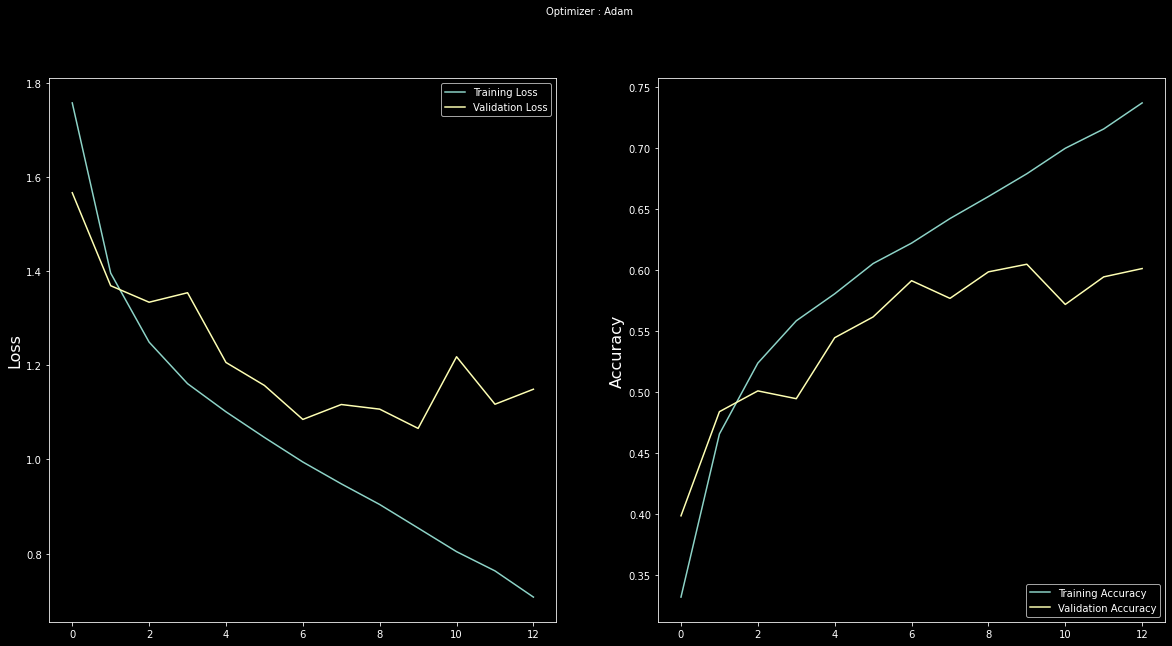

In [13]:
# Plotting Accuracy & Loss
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()